In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [65]:
df = pd.read_csv('/content/sentimentdataset.csv')

In [66]:
df.shape

(732, 15)

Getting familiaralised with the dataset

In [67]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [68]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [70]:
# dropping columns that are irrelevant
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'],inplace=True)
df.head(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8


In [71]:
df.drop(columns=['User'],inplace=True)
df.head(2)

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8


In [72]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [73]:
# platform col needs one hot encoding
# sentiment needs label encoding


In [74]:
df['Country'].value_counts()

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Ireland,1
Scotland,1
Kenya,1


In [75]:
# theres an issue with USA 59,55 needs standardising
list(df['Country'].unique())

[' USA      ',
 ' Canada   ',
 ' USA        ',
 ' UK       ',
 ' Australia ',
 ' India    ',
 ' USA    ',
 'USA',
 ' Canada    ',
 ' USA       ',
 ' USA ',
 ' Canada  ',
 ' UK ',
 ' India     ',
 ' Canada ',
 ' UK        ',
 ' India ',
 ' UK   ',
 ' UK         ',
 ' USA     ',
 ' Canada     ',
 ' USA          ',
 ' India      ',
 ' Australia  ',
 ' UK           ',
 ' Canada       ',
 ' Australia   ',
 ' Australia    ',
 ' UK            ',
 ' USA   ',
 ' India       ',
 ' UK          ',
 ' USA  ',
 ' UK      ',
 ' Canada      ',
 ' India   ',
 ' Canada          ',
 ' India        ',
 ' Australia     ',
 ' Canada        ',
 ' India         ',
 ' USA           ',
 ' USA               ',
 ' Canada            ',
 ' UK                ',
 ' India              ',
 ' Australia          ',
 ' France            ',
 ' Brazil            ',
 ' Japan             ',
 ' Greece            ',
 ' India             ',
 ' Brazil           ',
 ' France           ',
 ' Japan            ',
 ' Canada           

In [76]:
# problems with text col: lowercase , dublicates, check for URL, non_alphabets, spaces

Checking for hidden null values

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   Platform   732 non-null    object 
 4   Hashtags   732 non-null    object 
 5   Retweets   732 non-null    float64
 6   Likes      732 non-null    float64
 7   Country    732 non-null    object 
 8   Year       732 non-null    int64  
 9   Month      732 non-null    int64  
 10  Day        732 non-null    int64  
 11  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 68.8+ KB


In [78]:
# assuming int ones are alright

# checking the float ones
df['Retweets'].value_counts() #no missing
df['Likes'].value_counts() #no missing

,count
Likes,
45.0,94
35.0,77
50.0,75
30.0,73
40.0,62
60.0,55
55.0,50
70.0,41
25.0,23


In [79]:
df['Text'].value_counts()
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,44
Joy,42
Excitement,32
Happy,14
Neutral,14
...,...
Vibrancy,1
Culinary Adventure,1
Mesmerizing,1


In [80]:
list(df['Sentiment'].unique())
# sentiment needs to get standardised to positive, negative, neutral and some need to be dropped

[' Positive  ',
 ' Negative  ',
 ' Neutral   ',
 ' Anger        ',
 ' Fear         ',
 ' Sadness      ',
 ' Disgust      ',
 ' Happiness    ',
 ' Joy          ',
 ' Love         ',
 ' Amusement    ',
 ' Enjoyment    ',
 ' Admiration   ',
 ' Affection    ',
 ' Awe          ',
 ' Disappointed ',
 ' Surprise     ',
 ' Acceptance   ',
 ' Adoration    ',
 ' Anticipation ',
 ' Bitter       ',
 ' Calmness     ',
 ' Confusion    ',
 ' Excitement   ',
 ' Kind         ',
 ' Pride        ',
 ' Shame        ',
 ' Confusion ',
 ' Excitement ',
 ' Shame ',
 ' Elation       ',
 ' Euphoria      ',
 ' Contentment   ',
 ' Serenity      ',
 ' Gratitude     ',
 ' Hope          ',
 ' Empowerment   ',
 ' Compassion    ',
 ' Tenderness    ',
 ' Arousal       ',
 ' Enthusiasm    ',
 ' Fulfillment  ',
 ' Reverence     ',
 ' Compassion',
 ' Fulfillment   ',
 ' Reverence ',
 ' Elation   ',
 ' Despair         ',
 ' Grief           ',
 ' Loneliness      ',
 ' Jealousy        ',
 ' Resentment      ',
 ' Frustration

In [81]:
# timestamp is not required
df.drop(columns=['Timestamp'],inplace=True)

Feature Engg

In [82]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [83]:
df.head()

,Text,Sentiment,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [84]:
# text cleaning
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)

In [85]:
# for column text
df['Text'] = df['Text'].apply(preprocess_text)

In [86]:
df['Text']

,Text
0,enjoy beauti day park
1,traffic terribl morn
2,finish amaz workout 💪
3,excit upcom weekend getaway
4,tri new recip dinner tonight
...,...
727,collabor scienc project receiv recognit region...
728,attend surpris birthday parti organ friend sur...
729,success fundrais school chariti initi joy give...
730,particip multicultur festiv celebr divers musi...


In [87]:
df['Hashtags'] = df['Hashtags'].apply(preprocess_text)

In [88]:
df.head(2)

,Text,Sentiment,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,enjoy beauti day park,Positive,Twitter,natur park,15.0,30.0,USA,2023,1,15,12
1,traffic terribl morn,Negative,Twitter,traffic morn,5.0,10.0,Canada,2023,1,15,8


In [89]:
# working on the sentiment column

# removing the blank spaces first
df['Sentiment'] = df['Sentiment'].str.strip()

In [90]:
list(df['Sentiment'].unique())

['Positive',
 'Negative',
 'Neutral',
 'Anger',
 'Fear',
 'Sadness',
 'Disgust',
 'Happiness',
 'Joy',
 'Love',
 'Amusement',
 'Enjoyment',
 'Admiration',
 'Affection',
 'Awe',
 'Disappointed',
 'Surprise',
 'Acceptance',
 'Adoration',
 'Anticipation',
 'Bitter',
 'Calmness',
 'Confusion',
 'Excitement',
 'Kind',
 'Pride',
 'Shame',
 'Elation',
 'Euphoria',
 'Contentment',
 'Serenity',
 'Gratitude',
 'Hope',
 'Empowerment',
 'Compassion',
 'Tenderness',
 'Arousal',
 'Enthusiasm',
 'Fulfillment',
 'Reverence',
 'Despair',
 'Grief',
 'Loneliness',
 'Jealousy',
 'Resentment',
 'Frustration',
 'Boredom',
 'Anxiety',
 'Intimidation',
 'Helplessness',
 'Envy',
 'Regret',
 'Curiosity',
 'Indifference',
 'Numbness',
 'Melancholy',
 'Nostalgia',
 'Ambivalence',
 'Determination',
 'Zest',
 'Hopeful',
 'Proud',
 'Grateful',
 'Empathetic',
 'Compassionate',
 'Playful',
 'Free-spirited',
 'Inspired',
 'Confident',
 'Bitterness',
 'Yearning',
 'Fearful',
 'Apprehensive',
 'Overwhelmed',
 'Jealous',


In [91]:
irrelevant_sentiments = ['Anticipation', 'Numbness', 'Nostalgia', 'Elegance', 'Whimsy', 'Pensive', 'InnerJourney',
    'Emotion', 'Suspense', 'Renewed Effort', 'Miscalculation', 'Challenge', 'Envisioning History',
    'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic',
    'Thrilling Journey', "Nature's Beauty", 'Celestial Wonder', 'Creative Inspiration',
    'Runway Creativity', "Ocean's Freedom", 'Whispers of the Past']

In [92]:
# dropping them
df = df[~df['Sentiment'].isin(irrelevant_sentiments)]

In [93]:
sentiment_mapping = {
    # Positive
    'Positive': 'Positive', 'Happiness': 'Positive', 'Joy': 'Positive', 'Love': 'Positive',
    'Amusement': 'Positive', 'Enjoyment': 'Positive', 'Admiration': 'Positive',
    'Affection': 'Positive', 'Awe': 'Positive', 'Surprise': 'Positive',
    'Acceptance': 'Positive', 'Adoration': 'Positive', 'Anticipation': 'Positive',
    'Calmness': 'Positive', 'Excitement': 'Positive', 'Kind': 'Positive',
    'Pride': 'Positive', 'Elation': 'Positive', 'Euphoria': 'Positive',
    'Contentment': 'Positive', 'Serenity': 'Positive', 'Gratitude': 'Positive',
    'Hope': 'Positive', 'Empowerment': 'Positive', 'Compassion': 'Positive',
    'Tenderness': 'Positive', 'Arousal': 'Positive', 'Enthusiasm': 'Positive',
    'Fulfillment': 'Positive', 'Reverence': 'Positive', 'Curiosity': 'Positive',
    'Hopeful': 'Positive', 'Proud': 'Positive', 'Grateful': 'Positive', 'Empathetic': 'Positive',
    'Compassionate': 'Positive', 'Playful': 'Positive', 'Free-spirited': 'Positive',
    'Inspired': 'Positive', 'Confident': 'Positive', 'Thrill': 'Positive', 'Overjoyed': 'Positive',
    'Inspiration': 'Positive', 'Motivation': 'Positive', 'Satisfaction': 'Positive',
    'Blessed': 'Positive', 'Appreciation': 'Positive', 'Confidence': 'Positive',
    'Accomplishment': 'Positive', 'Wonderment': 'Positive', 'Optimism': 'Positive',
    'Enchantment': 'Positive', 'Intrigue': 'Positive', 'PlayfulJoy': 'Positive',
    'Mindfulness': 'Positive', 'Elegance': 'Positive', 'Harmony': 'Positive',
    'Creativity': 'Positive', 'Radiance': 'Positive', 'Wonder': 'Positive',
    'Rejuvenation': 'Positive', 'Coziness': 'Positive', 'Adventure': 'Positive',
    'Melodic': 'Positive', 'FestiveJoy': 'Positive', 'Freedom': 'Positive',
    'Dazzle': 'Positive', 'Adrenaline': 'Positive', 'ArtisticBurst': 'Positive',
    'Resilience': 'Positive', 'Immersion': 'Positive', 'Spark': 'Positive',
    'Marvel': 'Positive', 'Positivity': 'Positive', 'Kindness': 'Positive',
    'Friendship': 'Positive', 'Success': 'Positive', 'Exploration': 'Positive',
    'Amazement': 'Positive', 'Romance': 'Positive', 'Captivation': 'Positive',
    'Tranquility': 'Positive', 'Grandeur': 'Positive', 'Emotion': 'Positive',
    'Energy': 'Positive', 'Celebration': 'Positive', 'Charm': 'Positive',
    'Ecstasy': 'Positive', 'Colorful': 'Positive', 'Hypnotic': 'Positive',
    'Connection': 'Positive', 'Iconic': 'Positive', 'Engagement': 'Positive',
    'Touched': 'Positive', 'Triumph': 'Positive', 'Heartwarming': 'Positive',
    'Solace': 'Positive', 'Breakthrough': 'Positive', 'Relief': 'Positive',
    'Joy in Baking': 'Positive', 'Creative Inspiration': 'Positive', 'Happy': 'Positive',

    # Negative
    'Negative': 'Negative', 'Anger': 'Negative', 'Fear': 'Negative', 'Sadness': 'Negative',
    'Disgust': 'Negative', 'Disappointed': 'Negative', 'Bitter': 'Negative',
    'Shame': 'Negative', 'Despair': 'Negative', 'Grief': 'Negative', 'Loneliness': 'Negative',
    'Jealousy': 'Negative', 'Resentment': 'Negative', 'Frustration': 'Negative',
    'Boredom': 'Negative', 'Anxiety': 'Negative', 'Intimidation': 'Negative',
    'Helplessness': 'Negative', 'Envy': 'Negative', 'Regret': 'Negative',
    'Bitterness': 'Negative', 'Yearning': 'Negative', 'Fearful': 'Negative',
    'Apprehensive': 'Negative', 'Overwhelmed': 'Negative', 'Jealous': 'Negative',
    'Devastated': 'Negative', 'Frustrated': 'Negative', 'Envious': 'Negative',
    'Dismissive': 'Negative', 'Bittersweet': 'Negative', 'Pensive': 'Negative',
    'Heartbreak': 'Negative', 'Betrayal': 'Negative', 'Suffering': 'Negative',
    'EmotionalStorm': 'Negative', 'Isolation': 'Negative', 'Disappointment': 'Negative',
    'LostLove': 'Negative', 'Exhaustion': 'Negative', 'Sorrow': 'Negative',
    'Darkness': 'Negative', 'Desperation': 'Negative', 'Ruins': 'Negative',
    'Desolation': 'Negative', 'Loss': 'Negative', 'Heartache': 'Negative',
    'Solitude': 'Negative', 'Obstacle': 'Negative', 'Sympathy': 'Negative',
    'Pressure': 'Negative', 'Miscalculation': 'Negative', 'Challenge': 'Negative',
    'Embarrassed': 'Negative', 'Sad': 'Negative', 'Hate': 'Negative', 'Bad': 'Negative',

    # Neutral
    'Neutral': 'Neutral', 'Confusion': 'Neutral', 'Ambivalence': 'Neutral',
    'Determination': 'Neutral', 'Contemplation': 'Neutral', 'Reflection': 'Neutral',
    'DreamChaser': 'Neutral', 'Whimsy': 'Neutral', 'InnerJourney': 'Neutral',
    'CulinaryOdyssey': 'Neutral', 'Numbness': 'Neutral', 'Melancholy': 'Neutral',
    'Nostalgia': 'Neutral', 'Journey': 'Neutral', 'Suspense': 'Neutral',
    'Renewed Effort': 'Neutral', 'Envisioning History': 'Neutral', 'Imagination': 'Neutral',
    'Vibrancy': 'Neutral', 'Mesmerizing': 'Neutral', 'Culinary Adventure': 'Neutral',
    'Winter Magic': 'Neutral', 'Thrilling Journey': 'Neutral', "Nature's Beauty": 'Neutral',
    'Celestial Wonder': 'Neutral', 'Runway Creativity': 'Neutral', "Ocean's Freedom": 'Neutral',
    'Whispers of the Past': 'Neutral', 'Mischievous': 'Neutral'
}


In [94]:
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

<ipython-input-94-2189205786>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)


In [95]:
df.head(10)

,Text,Sentiment,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,enjoy beauti day park,Positive,Twitter,natur park,15.0,30.0,USA,2023,1,15,12
1,traffic terribl morn,Negative,Twitter,traffic morn,5.0,10.0,Canada,2023,1,15,8
2,finish amaz workout 💪,Positive,Instagram,fit workout,20.0,40.0,USA,2023,1,15,15
3,excit upcom weekend getaway,Positive,Facebook,travel adventur,8.0,15.0,UK,2023,1,15,18
4,tri new recip dinner tonight,Neutral,Instagram,cook food,12.0,25.0,Australia,2023,1,15,19
5,feel grate littl thing life,Positive,Twitter,gratitud positivevib,25.0,50.0,India,2023,1,16,9
6,raini day call cozi blanket hot cocoa,Positive,Facebook,rainyday cozi,10.0,20.0,Canada,2023,1,16,14
7,new movi releas mustwatch,Positive,Instagram,movienight mustwatch,15.0,30.0,USA,2023,1,16,19
8,polit discuss heat timelin,Negative,Twitter,polit debat,30.0,60.0,USA,2023,1,17,8
9,miss summer vibe beach day,Neutral,Facebook,summer beachday,18.0,35.0,Australia,2023,1,17,12


In [96]:
# one hot encoding on sentiment columns (using pandas)
sentiment_dummy = pd.get_dummies(df['Sentiment'],dtype=int)
sentiment_dummy

,Negative,Neutral,Positive
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
727,0,0,1
728,0,0,1
729,0,0,1
730,0,0,1


In [97]:
df = pd.concat([df,sentiment_dummy],axis=1)
df

,Text,Sentiment,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Negative,Neutral,Positive
0,enjoy beauti day park,Positive,Twitter,natur park,15.0,30.0,USA,2023,1,15,12,0,0,1
1,traffic terribl morn,Negative,Twitter,traffic morn,5.0,10.0,Canada,2023,1,15,8,1,0,0
2,finish amaz workout 💪,Positive,Instagram,fit workout,20.0,40.0,USA,2023,1,15,15,0,0,1
3,excit upcom weekend getaway,Positive,Facebook,travel adventur,8.0,15.0,UK,2023,1,15,18,0,0,1
4,tri new recip dinner tonight,Neutral,Instagram,cook food,12.0,25.0,Australia,2023,1,15,19,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,collabor scienc project receiv recognit region...,Positive,Facebook,sciencefairwinn highschoolsci,20.0,39.0,UK,2017,8,18,18,0,0,1
728,attend surpris birthday parti organ friend sur...,Positive,Instagram,surprisecelebr highschoolfriendship,25.0,48.0,USA,2018,6,22,14,0,0,1
729,success fundrais school chariti initi joy give...,Positive,Twitter,communitygiv highschoolphilanthropi,22.0,42.0,Canada,2019,4,5,17,0,0,1
730,particip multicultur festiv celebr divers musi...,Positive,Facebook,culturalcelebr highschoolun,21.0,43.0,UK,2020,2,29,20,0,0,1


In [98]:
# removing sentiment coln
df.drop(columns=['Sentiment'],inplace=True)
df

,Text,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Negative,Neutral,Positive
0,enjoy beauti day park,Twitter,natur park,15.0,30.0,USA,2023,1,15,12,0,0,1
1,traffic terribl morn,Twitter,traffic morn,5.0,10.0,Canada,2023,1,15,8,1,0,0
2,finish amaz workout 💪,Instagram,fit workout,20.0,40.0,USA,2023,1,15,15,0,0,1
3,excit upcom weekend getaway,Facebook,travel adventur,8.0,15.0,UK,2023,1,15,18,0,0,1
4,tri new recip dinner tonight,Instagram,cook food,12.0,25.0,Australia,2023,1,15,19,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,collabor scienc project receiv recognit region...,Facebook,sciencefairwinn highschoolsci,20.0,39.0,UK,2017,8,18,18,0,0,1
728,attend surpris birthday parti organ friend sur...,Instagram,surprisecelebr highschoolfriendship,25.0,48.0,USA,2018,6,22,14,0,0,1
729,success fundrais school chariti initi joy give...,Twitter,communitygiv highschoolphilanthropi,22.0,42.0,Canada,2019,4,5,17,0,0,1
730,particip multicultur festiv celebr divers musi...,Facebook,culturalcelebr highschoolun,21.0,43.0,UK,2020,2,29,20,0,0,1


In [99]:
df['Country'] = df['Country'].str.strip()

In [100]:
sorted(list(df['Country'].unique()))

['Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Colombia',
 'Czech Republic',
 'Denmark',
 'France',
 'Germany',
 'Greece',
 'India',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Maldives',
 'Netherlands',
 'Norway',
 'Peru',
 'Portugal',
 'Scotland',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'UK',
 'USA']

In [101]:
df.head()

,Text,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Negative,Neutral,Positive
0,enjoy beauti day park,Twitter,natur park,15.0,30.0,USA,2023,1,15,12,0,0,1
1,traffic terribl morn,Twitter,traffic morn,5.0,10.0,Canada,2023,1,15,8,1,0,0
2,finish amaz workout 💪,Instagram,fit workout,20.0,40.0,USA,2023,1,15,15,0,0,1
3,excit upcom weekend getaway,Facebook,travel adventur,8.0,15.0,UK,2023,1,15,18,0,0,1
4,tri new recip dinner tonight,Instagram,cook food,12.0,25.0,Australia,2023,1,15,19,0,1,0


In [102]:
df['Platform'] = df['Platform'].str.strip()

In [103]:
sorted(list(df['Platform'].unique()))

['Facebook', 'Instagram', 'Twitter']

Visualising Data

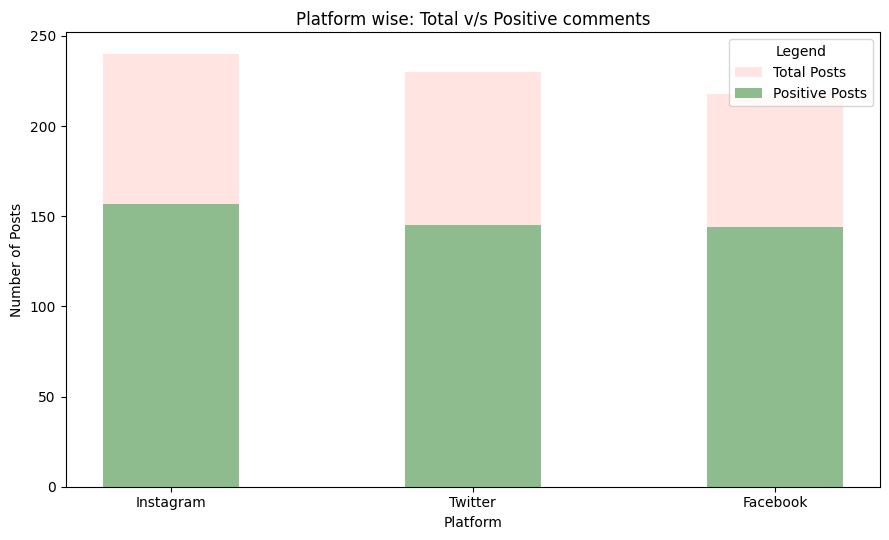

In [104]:
total_counts = df['Platform'].value_counts() #total post per platform
positive_counts = df[df['Positive'] == 1]['Platform'].value_counts() # +ve post per platform
positive_counts = positive_counts.reindex(total_counts.index, fill_value=0)
x = np.arange(len(total_counts.index))
plt.figure(figsize=(9,5.5))
plt.bar(x, total_counts.values, width=0.45, label='Total Posts', color='mistyrose')
plt.bar(x, positive_counts.values, width=0.45, label='Positive Posts', color='darkseagreen')
plt.xticks(x, total_counts.index, rotation=0)
plt.title('Platform wise: Total v/s Positive comments')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.legend(title='Legend')

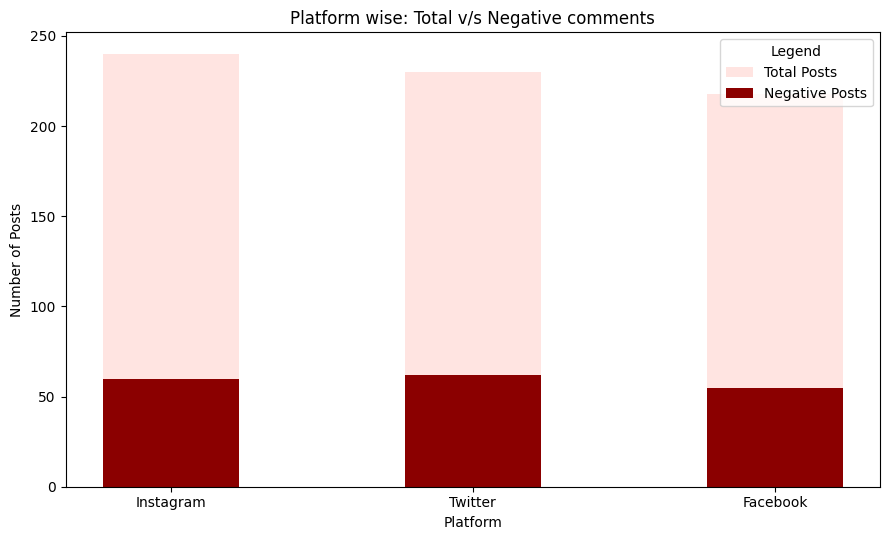

In [105]:
total_counts = df['Platform'].value_counts() #total post per platform
negative_counts = df[df['Negative'] == 1]['Platform'].value_counts() # +ve post per platform
negative_counts = negative_counts.reindex(total_counts.index, fill_value=0)
x = np.arange(len(total_counts.index))
plt.figure(figsize=(9,5.5))
plt.bar(x, total_counts.values, width=0.45, label='Total Posts', color='mistyrose')
plt.bar(x, negative_counts.values, width=0.45, label='Negative Posts', color='darkred')
plt.xticks(x, total_counts.index, rotation=0)
plt.title('Platform wise: Total v/s Negative comments')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.legend(title='Legend')

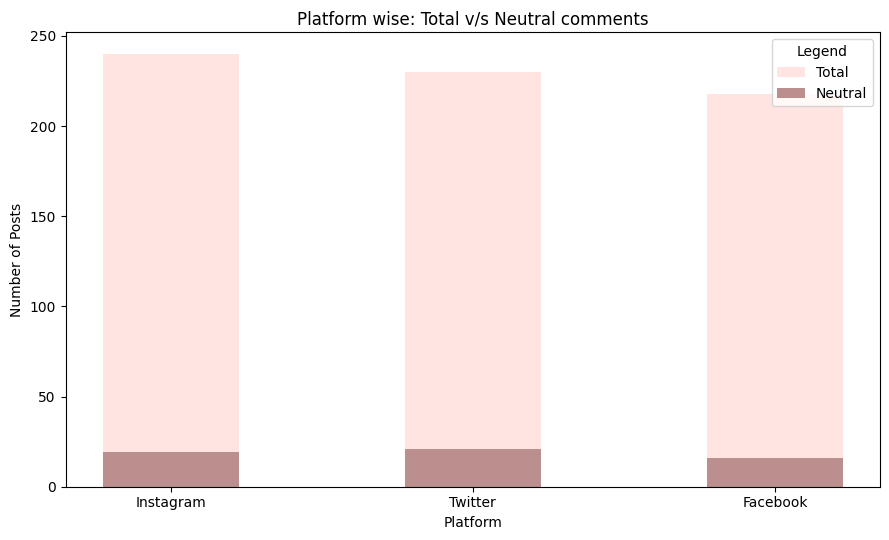

In [106]:
total_counts = df['Platform'].value_counts() #total post per platfor
neutral_counts = df[df['Neutral'] == 1]['Platform'].value_counts() # +ve post per platform
neutral_counts = neutral_counts.reindex(total_counts.index, fill_value=0)
x = np.arange(len(total_counts.index))
plt.figure(figsize=(9,5.5))
plt.bar(x, total_counts.values, width=0.45, label='Total', color='mistyrose')
plt.bar(x, neutral_counts.values, width=0.45, label='Neutral', color='rosybrown')
plt.xticks(x, total_counts.index, rotation=0)
plt.title('Platform wise: Total v/s Neutral comments')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.legend(title='Legend')

(np.float64(-1.099998031854074),
 np.float64(1.0999975698969562),
 np.float64(-1.099997851989407),
 np.float64(1.0999998040020509))

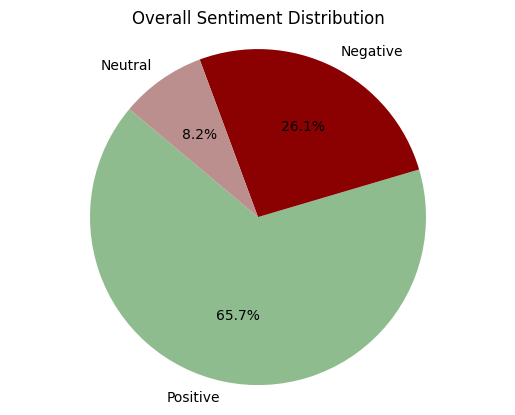

In [107]:
sentiment_counts = df[['Positive', 'Negative', 'Neutral']].sum()
pi_labels = ['Positive', 'Negative', 'Neutral']
colors = ['darkseagreen', 'darkred', 'rosybrown']
plt.pie(sentiment_counts, labels=pi_labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Overall Sentiment Distribution')
plt.axis('equal')

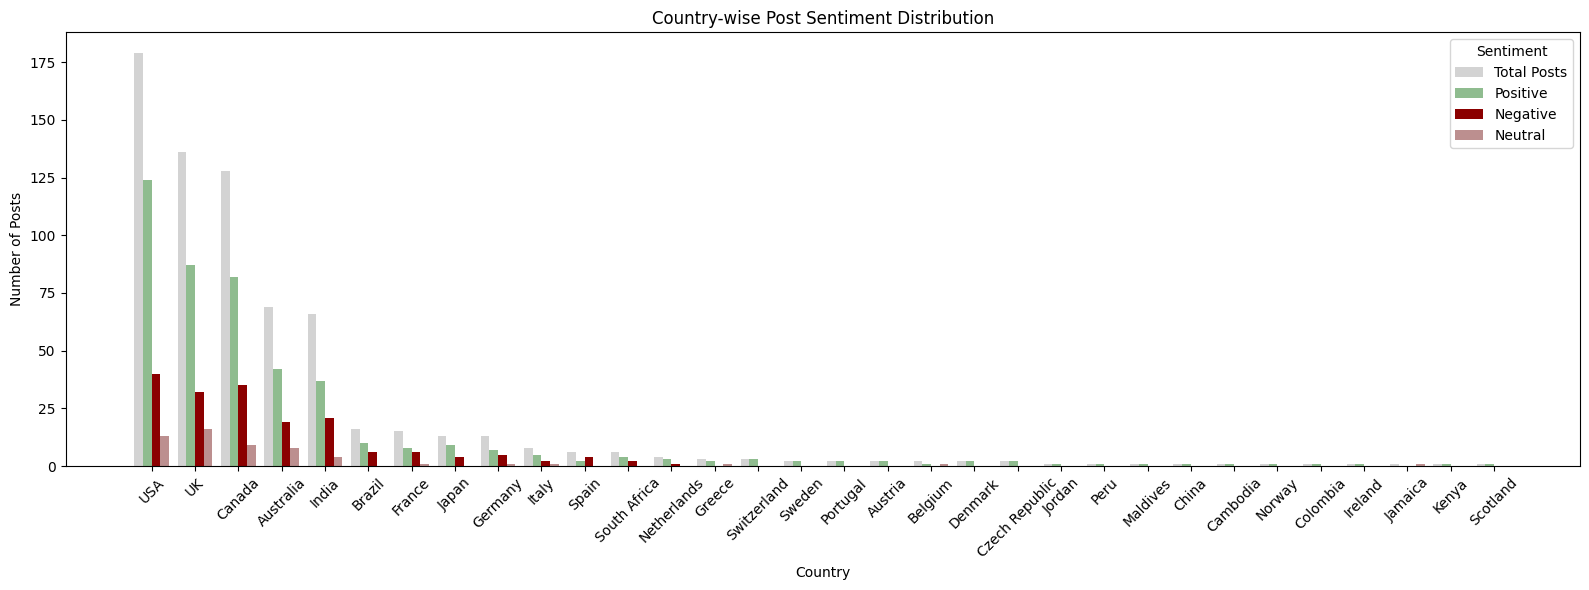

In [108]:
total_counts = df['Country'].value_counts()
positive_counts = df[df['Positive'] == 1]['Country'].value_counts()
negative_counts = df[df['Negative'] == 1]['Country'].value_counts()
neutral_counts  = df[df['Neutral']  == 1]['Country'].value_counts()

#same country order
countries = total_counts.index
positive_counts = positive_counts.reindex(countries, fill_value=0)
negative_counts = negative_counts.reindex(countries, fill_value=0)
neutral_counts  = neutral_counts.reindex(countries, fill_value=0)

x = np.arange(len(countries))
width = 0.2
plt.figure(figsize=(16, 6))
plt.bar(x - 1.5*width, total_counts.values, width, label='Total Posts',color='lightgray')
plt.bar(x - 0.5*width, positive_counts.values, width, label='Positive',color='darkseagreen')
plt.bar(x + 0.5*width, negative_counts.values, width, label='Negative',color='darkred')
plt.bar(x + 1.5*width, neutral_counts.values, width, label='Neutral',color='rosybrown')
plt.xticks(x, countries, rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Posts')
plt.title('Country-wise Post Sentiment Distribution')
plt.legend(title='Sentiment')
plt.tight_layout()

Vectorize

In [109]:
# multi-class classification ML model

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['Text'])
print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (688, 1850)


In [111]:
df

,Text,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Negative,Neutral,Positive
0,enjoy beauti day park,Twitter,natur park,15.0,30.0,USA,2023,1,15,12,0,0,1
1,traffic terribl morn,Twitter,traffic morn,5.0,10.0,Canada,2023,1,15,8,1,0,0
2,finish amaz workout 💪,Instagram,fit workout,20.0,40.0,USA,2023,1,15,15,0,0,1
3,excit upcom weekend getaway,Facebook,travel adventur,8.0,15.0,UK,2023,1,15,18,0,0,1
4,tri new recip dinner tonight,Instagram,cook food,12.0,25.0,Australia,2023,1,15,19,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,collabor scienc project receiv recognit region...,Facebook,sciencefairwinn highschoolsci,20.0,39.0,UK,2017,8,18,18,0,0,1
728,attend surpris birthday parti organ friend sur...,Instagram,surprisecelebr highschoolfriendship,25.0,48.0,USA,2018,6,22,14,0,0,1
729,success fundrais school chariti initi joy give...,Twitter,communitygiv highschoolphilanthropi,22.0,42.0,Canada,2019,4,5,17,0,0,1
730,particip multicultur festiv celebr divers musi...,Facebook,culturalcelebr highschoolun,21.0,43.0,UK,2020,2,29,20,0,0,1


In [112]:
# Convert one-hot columns to single label
df['Sentiment'] = df[['Negative', 'Neutral', 'Positive']].idxmax(axis=1)

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])  # Now values are 0, 1, 2

In [114]:
df.head()

,Text,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Negative,Neutral,Positive,Sentiment
0,enjoy beauti day park,Twitter,natur park,15.0,30.0,USA,2023,1,15,12,0,0,1,2
1,traffic terribl morn,Twitter,traffic morn,5.0,10.0,Canada,2023,1,15,8,1,0,0,0
2,finish amaz workout 💪,Instagram,fit workout,20.0,40.0,USA,2023,1,15,15,0,0,1,2
3,excit upcom weekend getaway,Facebook,travel adventur,8.0,15.0,UK,2023,1,15,18,0,0,1,2
4,tri new recip dinner tonight,Instagram,cook food,12.0,25.0,Australia,2023,1,15,19,0,1,0,1


Training & Testing

In [115]:
# X - predictor : df[text]-> vectorised -> X
# y - target : df[['Negative','Neutral','Positive']]

In [116]:
y = df['Sentiment']  # ✅ This should be a 1D array

In [117]:
df.shape

(688, 14)

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

Logistic Regression


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [127]:
# testing model
y_pred = model.predict(X_test)

In [128]:
y_pred

array([2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2])

In [129]:
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


--- Logistic Regression ---
Accuracy: 0.8985507246376812
              precision    recall  f1-score   support

    Negative       0.94      0.89      0.92        37
     Neutral       0.88      0.44      0.58        16
    Positive       0.88      0.99      0.93        85

    accuracy                           0.90       138
   macro avg       0.90      0.77      0.81       138
weighted avg       0.90      0.90      0.89       138



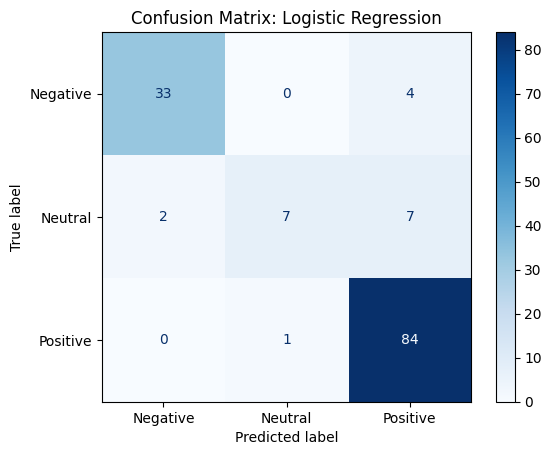

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

Multinomial Naive Bayes

In [130]:
from sklearn.naive_bayes import MultinomialNB

In [131]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [132]:
print("\n--- Multinomial Naive Bayes ---")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


--- Multinomial Naive Bayes ---
Accuracy: 0.7536231884057971
              precision    recall  f1-score   support

    Negative       1.00      0.51      0.68        37
     Neutral       0.00      0.00      0.00        16
    Positive       0.71      1.00      0.83        85

    accuracy                           0.75       138
   macro avg       0.57      0.50      0.50       138
weighted avg       0.71      0.75      0.70       138



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


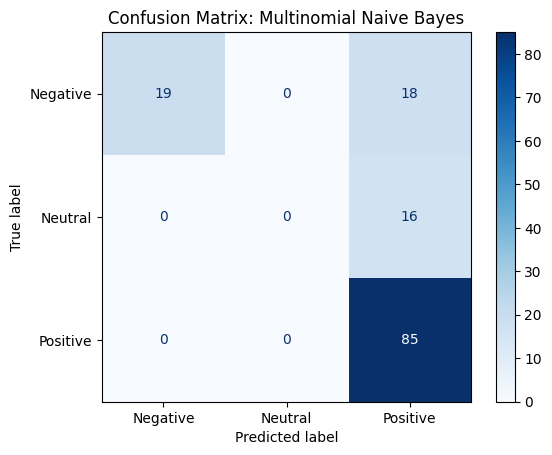

In [152]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix: Multinomial Naive Bayes")
plt.show()

Support Vector Machine (LinearSVC)

In [133]:
from sklearn.svm import LinearSVC

In [134]:
svm_model = LinearSVC(class_weight='balanced', max_iter=1000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [135]:
print("\n--- Support Vector Machine (LinearSVC) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


--- Support Vector Machine (LinearSVC) ---
Accuracy: 0.8913043478260869
              precision    recall  f1-score   support

    Negative       1.00      0.84      0.91        37
     Neutral       1.00      0.44      0.61        16
    Positive       0.85      1.00      0.92        85

    accuracy                           0.89       138
   macro avg       0.95      0.76      0.81       138
weighted avg       0.91      0.89      0.88       138



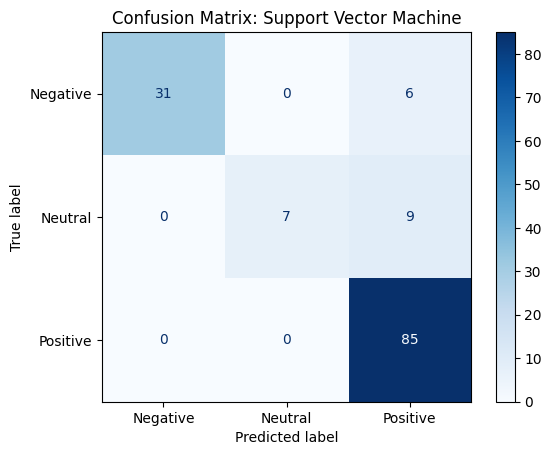

In [153]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix: Support Vector Machine")
plt.show()

Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=24)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [138]:
print("\n--- Random Forest Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


--- Random Forest Classifier ---
Accuracy: 0.7898550724637681
              precision    recall  f1-score   support

    Negative       0.96      0.59      0.73        37
     Neutral       1.00      0.19      0.32        16
    Positive       0.75      0.99      0.85        85

    accuracy                           0.79       138
   macro avg       0.90      0.59      0.63       138
weighted avg       0.83      0.79      0.76       138



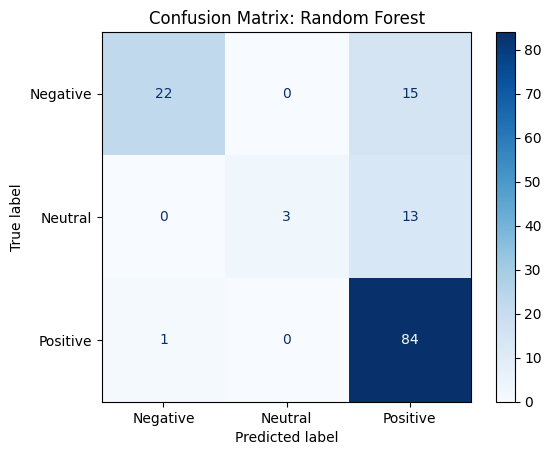

In [154]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix: Random Forest")
plt.show()

K-Nearest Neighbors


In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [141]:
print("\n--- K-Nearest Neighbors (KNN) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.855072463768116
              precision    recall  f1-score   support

    Negative       0.97      0.76      0.85        37
     Neutral       0.86      0.38      0.52        16
    Positive       0.82      0.99      0.90        85

    accuracy                           0.86       138
   macro avg       0.88      0.71      0.76       138
weighted avg       0.87      0.86      0.84       138



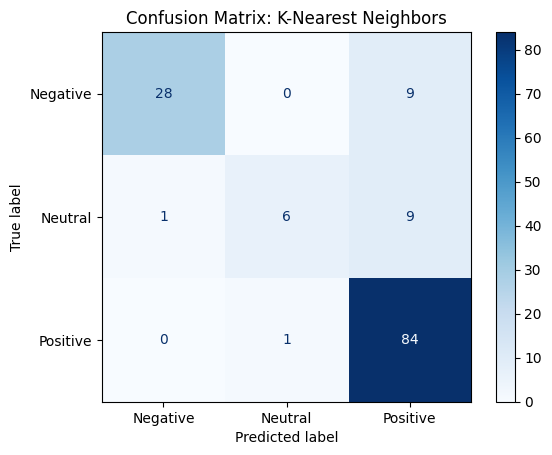

In [155]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix: K-Nearest Neighbors")
plt.show()

In [122]:
print(df['Sentiment'].value_counts())


Sentiment
2    446
0    186
1     56
Name: count, dtype: int64


In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.94      0.89      0.92        37
     Neutral       0.88      0.44      0.58        16
    Positive       0.88      0.99      0.93        85

    accuracy                           0.90       138
   macro avg       0.90      0.77      0.81       138
weighted avg       0.90      0.90      0.89       138



In [124]:
# Example test cases
test_cases = [
    "I love this product!",
    "Worst experience ever.",
    "It's okay, not great.",
    "Absolutely fantastic service.",
    "I wouldn't recommend this."
]

# Prediction block
print("--- Quick Model Predictions on Test Cases ---")
for text in test_cases:
    cleaned = preprocess_text(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    sentiment = le.inverse_transform(prediction)[0]
    print(f"Text: {text}\nPrediction: {sentiment}\n")

--- Quick Model Predictions on Test Cases ---
Text: I love this product!
Prediction: Positive

Text: Worst experience ever.
Prediction: Neutral

Text: It's okay, not great.
Prediction: Positive

Text: Absolutely fantastic service.
Prediction: Negative

Text: I wouldn't recommend this.
Prediction: Positive



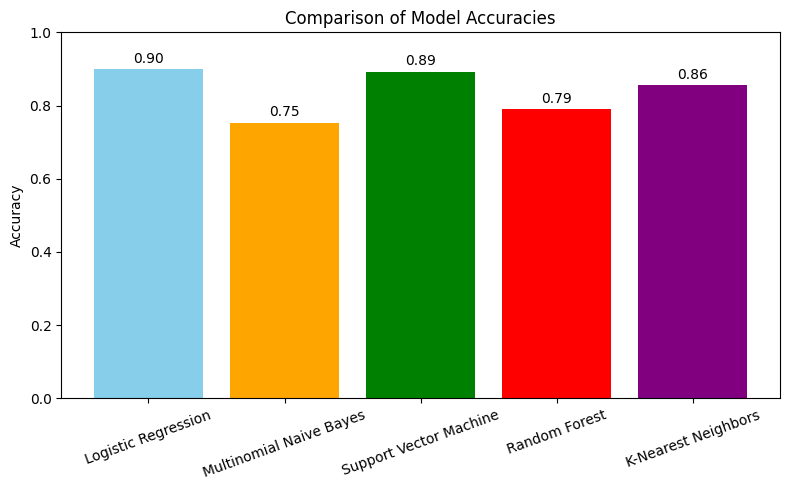

In [142]:
# models and their accuracies
model_names = [
    "Logistic Regression",
    "Multinomial Naive Bayes",
    "Support Vector Machine",
    "Random Forest",
    "K-Nearest Neighbors"]
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn)]

plt.figure(figsize=(8,5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=20)
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f"{acc:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

Frequent words

In [147]:
from collections import Counter
from wordcloud import WordCloud

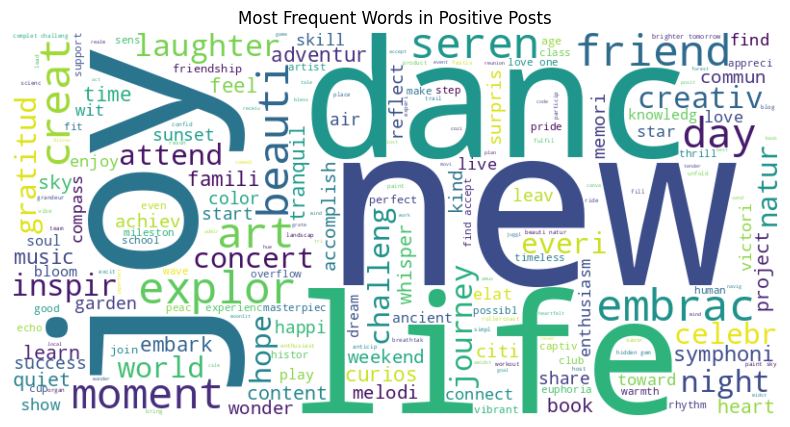

In [148]:
# Positive Sentiment Word Cloud
subset = df[df['Sentiment'] == le.transform(['Positive'])[0]]
words = " ".join(subset['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Posts')
plt.show()

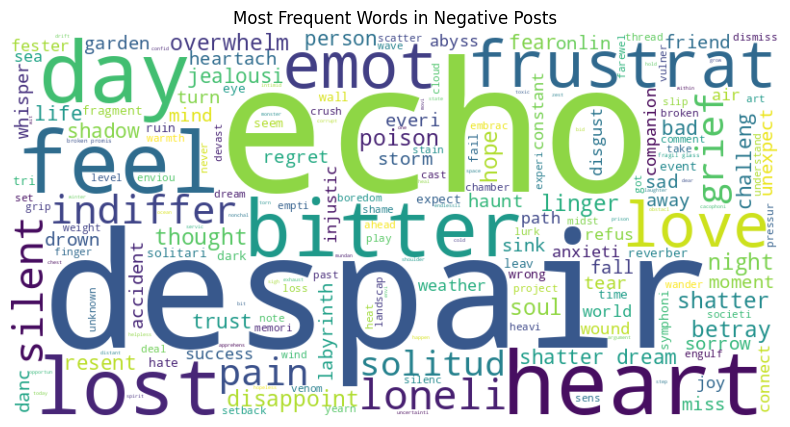

In [149]:
# Negative Sentiment Word Cloud
subset = df[df['Sentiment'] == le.transform(['Negative'])[0]]
words = " ".join(subset['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Posts')
plt.show()

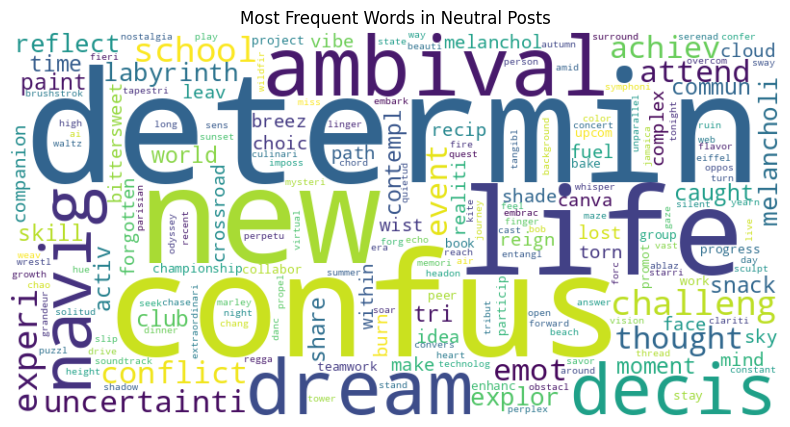

In [150]:
# Neutral Sentiment Word Cloud
subset = df[df['Sentiment'] == le.transform(['Neutral'])[0]]
words = " ".join(subset['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Neutral Posts')
plt.show()